In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from plots import make_scatter_line_plots, make_BOI_AF_scatter_plot, make_line_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# conversion factor
area_2km_pixel = (2193 * 1000) * (2193 * 1000)  # unit in mm2

# area of basins
gmd4_area = 12737667189.642 * (1000 * 1000) # in mm2  
gmd3_area = 21820149683.491 * (1000 * 1000) # in mm2  
rpb_area = 22753400088.854 * (1000 * 1000) # in mm2  
hqr_area = 1982641859.510 * (1000 * 1000) # in mm2 
doug_area = 2459122191.981 * (1000 * 1000) # in mm2 
dv_area = 1933578136.225 * (1000 * 1000) # in mm2 

# model version = V8

# GMD4, Kansas

In [7]:
gmd4_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD4_KS/KS_GMD4_netGW_pumping.csv')
gmd4_annual = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD4_KS/KS_GMD4_annual.csv')

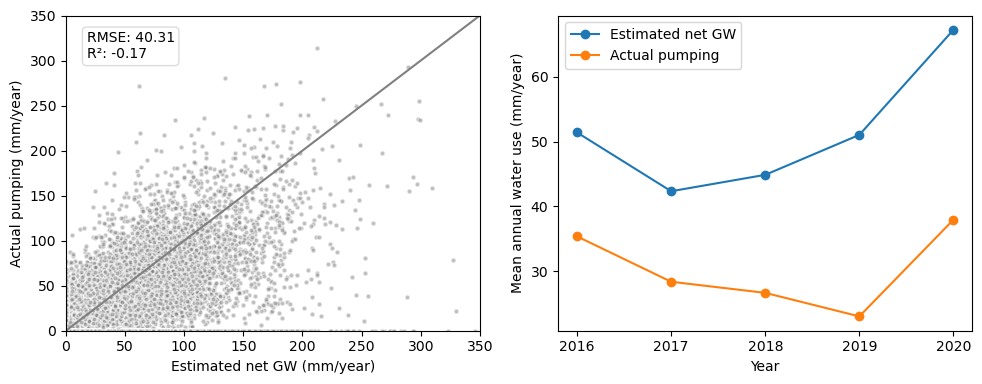

In [8]:
make_scatter_line_plots(x1=gmd4_df.netGW_mm, y1=gmd4_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 350), 
                        make_line_plot=True, 
                        x2=gmd4_annual.netGW_mm, y2=gmd4_annual.pumping_mm,
                        area_basin_mm2=gmd4_area,
                        year=gmd4_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping',
                        area_2km_pixel=4809249000000)

-------------------

# GMD3, Kansas

In [9]:
gmd3_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD3_KS/KS_GMD3_netGW_pumping.csv')
gmd3_annual = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD3_KS/KS_GMD3_annual.csv')

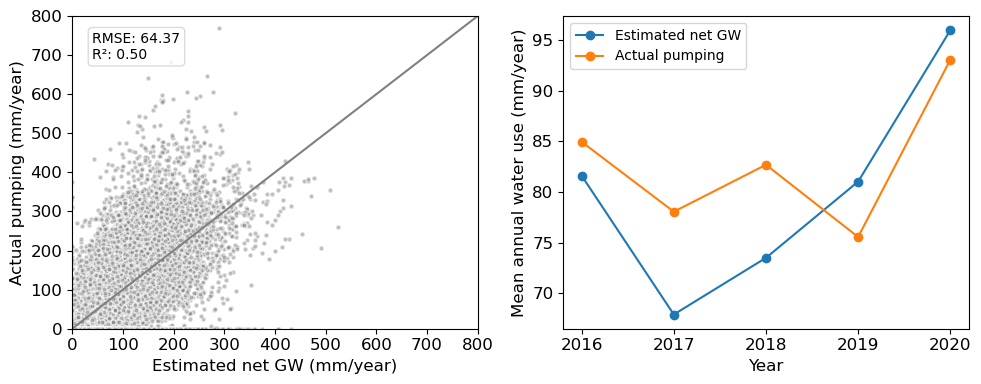

In [10]:
make_scatter_line_plots(x1=gmd3_df.netGW_mm, y1=gmd3_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 800), 
                        make_line_plot=True, 
                        x2=gmd3_annual.netGW_mm, y2=gmd3_annual.pumping_mm,
                        area_basin_mm2=gmd3_area,
                        year=gmd3_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping',
                        area_2km_pixel=4809249000000)

### netGW conversion to pumping

R2:  0.4651702584989824
RMSE:  66.5628852412894


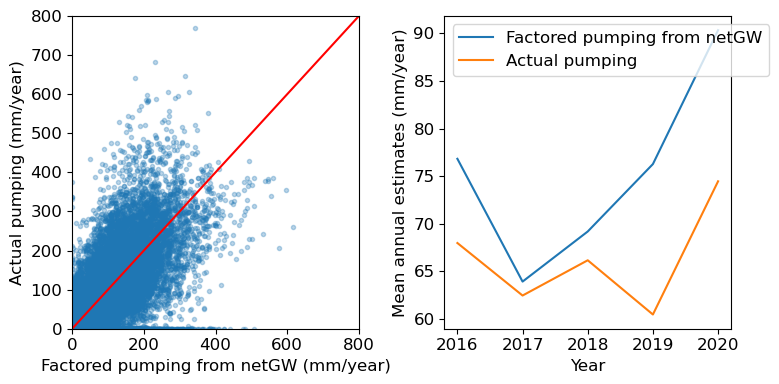

In [11]:
gmd3_df['factored_pumping'] = gmd3_df['netGW_mm'] /0.85

r2 = r2_score(gmd3_df.pumping_mm, gmd3_df.factored_pumping)
print('R2: ', r2)

rmse = mean_squared_error(gmd3_df.pumping_mm, gmd3_df.factored_pumping, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(gmd3_df.factored_pumping, gmd3_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Factored pumping from netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean in mm/year
yearly_mean = gmd3_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.factored_pumping, label='Factored pumping from netGW')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

plt.tight_layout()

---------

# RPB, Colorado

In [12]:
rpb_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/RPB_CO/CO_RPB_netGW_pumping.csv')
rpb_annual = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/RPB_CO/CO_RPB_annual.csv')

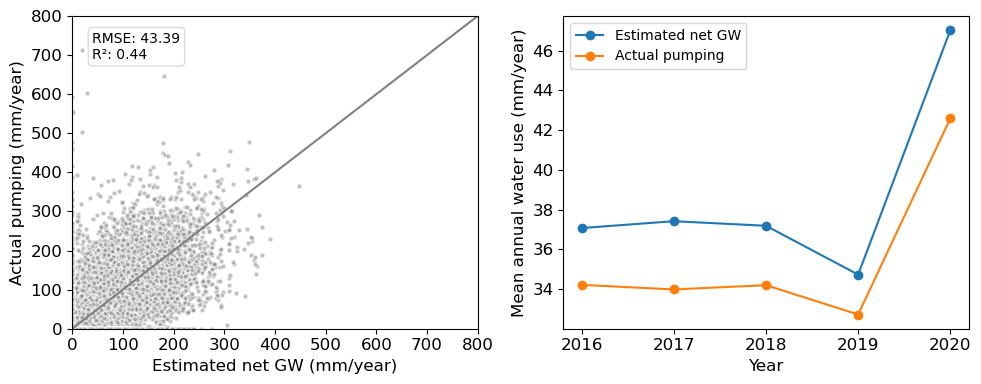

In [13]:
make_scatter_line_plots(x1=rpb_df.netGW_mm, y1=rpb_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 800), 
                        make_line_plot=True, 
                        x2=rpb_annual.netGW_mm, y2=rpb_annual.pumping_mm,
                        area_basin_mm2=rpb_area,
                        year=rpb_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping',
                        area_2km_pixel=4809249000000)

________________

# Harquahala INA, Arizona

In [14]:
hqr_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Harquahala_INA_AZ/AZ_Harquahala_INA_netGW_pumping_updated.csv')
hqr_annual = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Harquahala_INA_AZ/AZ_Harquahala_INA_annual.csv')

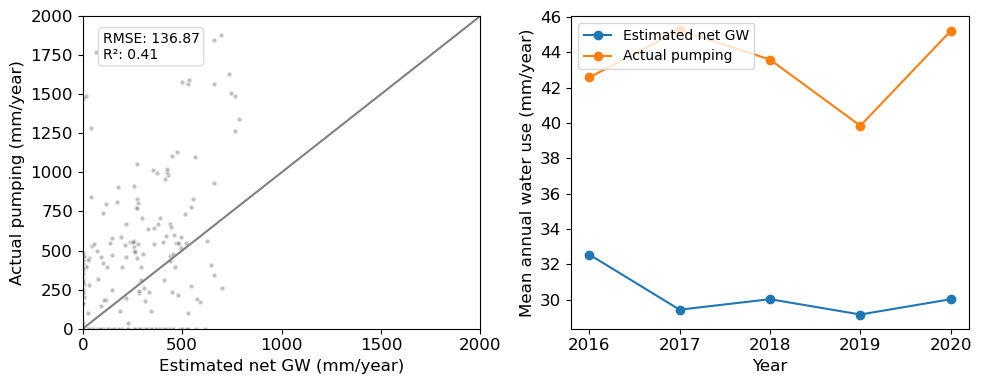

In [15]:
make_scatter_line_plots(x1=hqr_df.netGW_mm, y1=hqr_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 2000), 
                        make_line_plot=True, 
                        x2=hqr_annual.netGW_mm, y2=hqr_annual.pumping_mm,
                        area_basin_mm2=hqr_area,
                        year=rpb_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping',
                        area_2km_pixel=4809249000000)

### efficiency

In [16]:
hqr_annual['efficiency'] =  hqr_annual['netGW_mm']  / hqr_annual['pumping_mm']
hqr_annual

,year,netGW_mm,pumping_mm,pumping_AF,netGW_AF,efficiency
0,2016,13424.746303,17555.387440,68447.0803,52342.085283,0.764708
1,2017,12136.945011,18657.687050,72744.8600,47321.044380,0.650506
2,2018,12382.142085,17973.539200,70077.4197,48277.049789,0.688910
3,2019,12024.692610,16428.403667,64053.0582,46883.380608,0.731945
4,2020,12381.066453,18639.860434,72675.3553,48272.856054,0.664225


------------------

# Douglas AMA, Arizona

In [17]:
doug_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Douglas_AMA_AZ/AZ_Douglas_AMA_netGW_pumping_updated.csv')
doug_annual = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Douglas_AMA_AZ/AZ_Douglas_AMA_annual.csv')

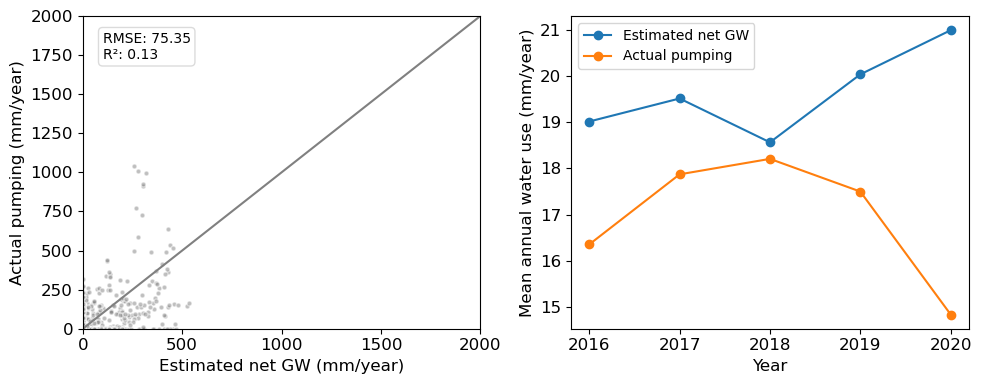

In [18]:
make_scatter_line_plots(x1=doug_df.netGW_mm, y1=doug_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 2000), 
                        make_line_plot=True, 
                        x2=doug_annual.netGW_mm, y2=doug_annual.pumping_mm,
                        area_basin_mm2=doug_area,
                        year=doug_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping',
                        area_2km_pixel=4809249000000)

### efficiency

In [19]:
doug_annual['efficiency'] =  doug_annual['netGW_mm']  / doug_annual['pumping_mm']
doug_annual

,year,netGW_mm,pumping_mm,pumping_AF,netGW_AF,efficiency
0,2016,9722.518488,8363.943484,32610.360040,37907.375243,1.162432
1,2017,9976.979988,9138.680801,35631.000025,38899.501816,1.091731
2,2018,9492.497375,9309.604911,36297.420000,37010.540069,1.019646
3,2019,10243.740016,8948.269149,34888.600200,39939.579061,1.144773
4,2020,10731.657123,7589.396006,29590.460080,41841.931459,1.414033


----------

# Diamod Valley, Nevada

In [7]:
dv_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Diamond_Valley_NV/NV_Diamond_Valley_annual.csv')
dv_df

,year,netGW_AF,pumping_AF,mean netGW_mm,mean pumping_mm
0,2018,48301.327300,46854.596518,30.812724,29.889816
1,2019,49002.096495,44531.918956,31.259764,28.408117
2,2020,58243.717575,59623.316935,37.155244,38.035328


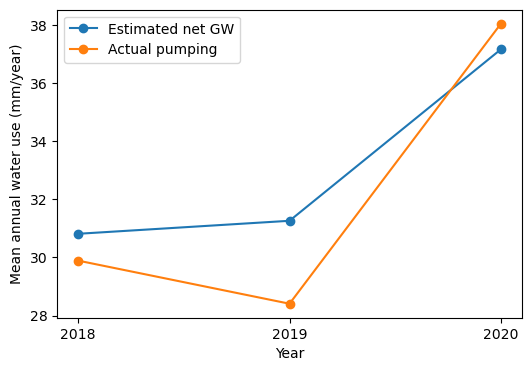

In [8]:
make_line_plot(x=dv_df['mean netGW_mm'], y=dv_df['mean pumping_mm'], 
               fontsize=12, year= dv_df['year'], 
               xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)', 
               line_label_1='Estimated net GW', line_label_2='Actual pumping')

----------------

# Harney Basin, OR

In [9]:
hrn_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Harney_Basin_OR/OR_Harney_Basin_annual.csv')
hrn_df

,year,netGW_AF,area_irrig,pumping_AF,mean netGW_mm,mean pumping_mm
0,2016,19707.616183,6.692286e+13,9745.275173,363.238903,785.809505
1,2017,26100.638925,8.153504e+13,8041.356017,394.856795,648.414117
2,2018,25922.513322,8.035820e+13,9695.555198,397.905270,781.800339
3,2019,25556.350431,8.705127e+13,8300.565889,362.123307,669.315485
4,2020,26170.836651,8.213663e+13,8144.835966,393.018932,656.758214


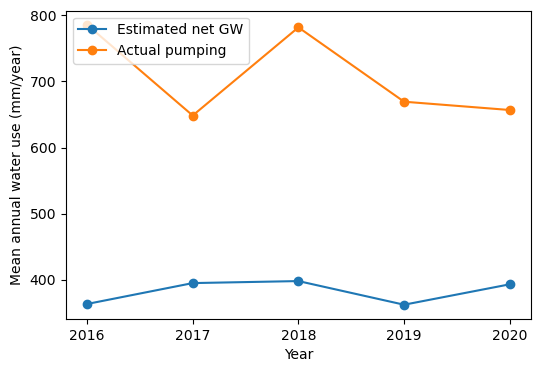

In [10]:
make_line_plot(x=hrn_df['mean netGW_mm'], y=hrn_df['mean pumping_mm'], 
               fontsize=12, year= hrn_df['year'], 
               xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)', 
               line_label_1='Estimated net GW', line_label_2='Actual pumping')

-----------

# Annual pumping vs net GW (in AF) comparison for all basins

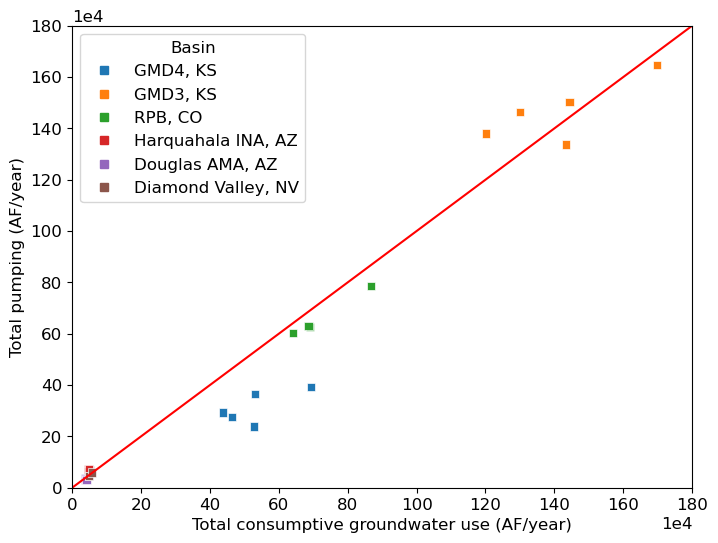

In [12]:
af_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/annual_AF_pumping_netGW_BOI.csv')

make_BOI_AF_scatter_plot(df=af_df, x='netGW_AF', y='pumping_AF', hue='basin',
                         xlabel = 'Total consumptive groundwater use (AF/year)', 
                         ylabel='Total pumping (AF/year)', 
                         fontsize=12, lim=(0, 1800000))